# Metropolis-Montecarlo para Ising 2D



In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/')


Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [ ]:
# Bibliotecas a utilizar
import copy
import numpy as np
import matplotlib.pyplot as plt

def hamiltonian(state,J):
    H   = 0
    N,N = np.shape(state)

    for i in range(N): # 0, 1, ..., N-1
        for j in range(N):
            a = (i+1)%N
            b = (j+1)%N
            H = H + state[i,j]*(state[a,j] + state[i,b])
    return -J*H

def reduced(state,i,j,J):
    '''Energy contribution from a single spin'''
    N,N = np.shape(state)
    a = (i+1)%N
    b = (j+1)%N
    c = (i-1)%N
    d = (j-1)%N
    return -J*state[i,j]*(state[a,j]+state[c,j]+state[i,b]+state[i,d])

def montecarlo(beta,N=4,J=1,out_freq=100,num_iters=200000,odir=''):

    state  = np.random.choice([-1,1],size=(N,N))
    state0 = copy.copy(state)
    magnetiz = []
    energies = []

    for k in range(num_iters):


      if k%out_freq == 0:
          energies.append(hamiltonian(state,J))
          magnetiz.append((np.sum(state))/N**2)


      i,j = np.random.randint(N), np.random.randint(N)
      H0  = reduced(state,i,j,J)


      state[i,j] = -1*state[i,j]
      H = reduced(state,i,j,J)
      deltaH = H-H0

      if deltaH<=0:
          pass
      else:
          prob = np.exp(-beta*deltaH)
          coin = np.random.random()
          if coin<prob:
              pass
          else:
              state[i,j] = -1*state[i,j]


    return np.array(magnetiz),np.array(energies),state,state0


# Termalizacion
Elegir configuraciones iniciales al azar pone al sistema en un punto del espacio de fases que generalmente tiene poco que ver con configuraciones típicas exploradas por el sistema en equilibrio para valores dados de T . Analice, a partir de la evolución de los observables del item (1.a) el número de pasos necesarios para considerar al sitema “termalizado”. Realice esta estimación para diferentes temperaturas, en particular para temperaturas mayores, menores y cercanas a la $T_c$. Este análisis le debe servir para estimar el número de configuraciones iniciales que debe ser descartado para el calculo de valores medios en equilibrio. ¿Con que configuración nos conviene arrancar a cada $T$?


En el siguiente codigo no hay nada nuevo, simplemente fui variando la temperatura en el intervalo entre 1 y 4 grados kelvin, y para cada valor tratar de estimar a ojo el punto desde el cual podia tomar al sistema como termalizado. Lo que hice fue (aproximadamente), dividir el rango entre 0 y 2, y el rango entre 3 y 4, de a 0.25. Mientras que en el rango entre 2 y 3 en el cual observaba que pasaban cosas mas "raras", lo dividi de a 0.15.
De todas formas, al final cuando grafique la susceptibilidad y el cv, al ver mejor por donde andaba la temp critica del sistema, agregue un par de mediciones cerca de Tc.

Esto no sabia si escribirlo muy detalladamente o no, al final adjunto bastantes graficos de los distintos datos que recolecte. Basicamente para el primer rango fue posible observar que la termalizacion comenzaba mas o menos a partir de la iteracion numero 3000-5000.

A medida que aumente la temperatura llegue a tener que considerar al sistema termalizado de la iteracion 15000-30000. Es decir aumentó considerablemente desde donde empezar a mirar para tomar los promedios.

Otra aclaracion es que para las temperaturas del ultimo rango, la magnetizacion toma valores bastante bruscos, y practicamente me fue muy dificil saber si habia termalizado o no. En esas situaciones por ahi me concentre en iteraciones altas cosas de asegurarme la termalizacion.

# Magnetización y energía media en función de la temperatura





1)Para una red cuadrada de spines de lado L=32, realicé un barrido (es el mismo que del primer item) levantando 27 temperaturas diferentes. Aumente la resolucion de sampleo en la region de $T \sim T_c$. Lo que no se me ocurrio como hacer sin destruir el codigo fue reutilizar la ultima configuracion de una temperatura para la temperatura siguiente.

Basicamente, con una T, calculaba la magnetizacion, y appendeaba en una lista el valor medio de la magnetizacion y de la energia comenzando a iterar desde el valor que observaba en el grafico. Todos los resultados los fui guardando en el drive.

A esta altura voy a ser totalmente sincero me estuve ayudando un monton de este trabajo que hacen escencialmente algo muy parecido, una red cuadrada de L=32. https://arxiv.org/pdf/0803.0217.pdf
No es que me haya ayudado mucho pero algunos valores teoricos los saque de ahi.

In [ ]:
Temperatura= [0.25, 0.5, 0.75, 1.0, 1.25, 1.5, 1.75, 2.0, 2.05, 2.1, 2.15, 2.2, 2.25, 2.3, 2.35, 2.4, 2.45, 2.5, 2.55, 2.6, 2.65, 2.7, 2.75, 2.8, 3.0, 3.25, 3.5]
Magnetizacion= [1.0, 1.0, 0.9999290364583333, 0.9992493489583333, 0.99604296875, 0.9855065104166667, 0.9554596354166667, 0.9143391927083333, 0.88597578125, 0.86646640625, 0.80118125, 0.7932518229166666, 0.7414708333333333, 0.7102323521205357, 0.430499365234375, 0.29633602430555556, 0.241797998046875, 0.189846533203125, 0.176615869140625, 0.1615065625, 0.12542015625, 0.1181009375, 0.116076171875, 0.107089609375, 0.09300139508928572, 0.08223465401785714, 0.058778076171875]
Energias= [2048.0, 2048.0, 2047.7093333333332, 2045.0066666666667, 2032.476, 1995.384, 1912.5426666666667, 1789.3626666666667, 1740.4581333333333, 1699.4544, 1621.25312, 1578.2858666666666, 1514.8181333333334, 1470.523, 1316.84923, 1235.2770222222223, 1182.6451, 1130.9554, 1097.1218, 1062.9104, 1007.86048, 989.14304, 955.87184, 932.21248, 831.6897142857143, 747.2971428571428, 674.632]

***LA SIGUIENTE CELDA NO LA CORRAS***

In [ ]:
T=3.75
pasos = 10000
N = 32
num_iters = pasos * 100
beta= 1.0/T

out_freq  = 100

magnetiz, energies, state, state0 = montecarlo(beta,
                                              N=N,
                                              J=1,
                                              num_iters=num_iters,
                                              out_freq=out_freq)

steps = np.arange(num_iters//out_freq)
plt.figure(1)
plt.plot(steps, abs(magnetiz),label = 'Magnetización total instantánea' )
plt.xlabel('Iteración')
plt.ylabel('Magnetización')
plt.title('T = {temp}, Largo de la red = {N}'.format(temp = T, N=N))
plt.legend()


In [ ]:
trigger=2000
MagnetizMean=np.mean(abs(magnetiz)[trigger:])
EnergiaMean=np.mean(abs(energies)[trigger:])
print(MagnetizMean)

0.0541962890625


In [ ]:
#MAGNETIZACIONES EN ORDEN DE TEMPERATURAS
Magnetizacion.append(MagnetizMean)
Energias.append(EnergiaMean)
Temperatura.append(T)
print('Temperatura=',Temperatura)
print('Magnetizacion=',Magnetizacion)
print('Energias=',Energias)

In [ ]:
np.save('gdrive/DIRECTORIO/Magnetizacion de T={temp}'.format(temp = T,pas=pasos , trig=trigger), magnetiz[trigger:])
np.save('gdrive/DIRECTORIO/Energia de T={temp}'.format(temp=T,pas=pasos , trig=trigger), energies[trigger:])

A continuacion tome los valores medios de la magnetizacion y los grafique en funcion de la temperatura.

***Correr desde aca***

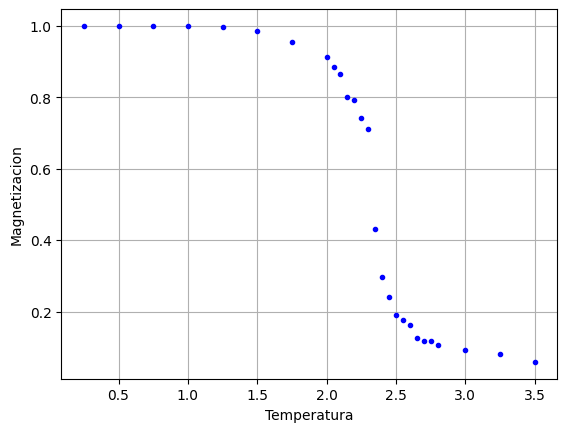

In [ ]:

plt.plot(Temperatura,Magnetizacion, linestyle='None',marker='.', markersize = 6.0, color='b')
plt.ylabel('Magnetizacion')
plt.xlabel('Temperatura')
plt.grid()


Se ve que se comporta de forma parecida a lo que esperaria segun el caso de aproximacion de campo medio (que la transicion se de forma mas abrupta tal que en el valor de Tc el sistema comience a magnetizarse partiendo de 0 magnetizacion). Aca tenemos como una transicion mas continua. de aca ya veo que mi temperatura critica esta entre T=2 y T=2.5.

2)Ahora analizo el comportamiento de las fluctuaciones asociadas a la magnetizacion y a la energia. Las mismas estan relacionadas con la capcaidad calorifica y la susceptibilidad respectivamente. Muestro la cuenta para la capacidad calorifica y es analogo para la susceptibilidad.

Yo se que $$C_v=\frac{\partial{U}}{\partial{T}}=-\frac{\beta}{T}\frac{\partial{U}}{\partial{\beta}}$$

Escribiendo que la energia es $U=-\frac{\partial{ln(Z)}}{\partial{\beta}}$, entonces se tiene que

$$ C_v=\frac{\beta}{T}\frac{\partial^2{ln(Z)}}{\partial{\beta}^2}=\frac{\beta}{T}\frac{\partial}{\partial{\beta}}(\frac{\partial{ln(Z)}}{\partial{\beta}})$$

Y esta ultima derivada es equivalente a

$$ C_v= \frac{\beta}{T}(\frac{1}{Z}\frac{\partial^2{Z}}{\partial{\beta}^2}-\frac{1}{Z^2}(\frac{\partial{ln(Z)}}{\partial{\beta}})^2)$$
Asi, para la capacidad calorifica tengo:

$$C_v=\frac{1}{k \;T^2}(<E^2>-<E>^2)$$

Es analogo para la susceptibilidad sabiendo que $\chi=\frac{\partial{M}}{\partial{B}}$ que para la susceptibilidad:

$$\chi=\frac{1}{k \;T}(<M^2>-<M>^2)$$

A continuacion lo que hice fue justamente armar dos listas, una para el Cv y otra para la susceptibilidad. Los valores medios al cuadrado ya los tenia, simplemente eleve al cuadrado mis valores medios originales.
Para el valor medio de los valores al cuadrado simplemente eleve al cuadrado los valores que guarde en el drive y a eso les calcule el valor medio.

In [ ]:
#Aca calcula la capacidad calorifica
Mediosdelcuadrado_E=[]
Cuadradosdemedio_E=np.array(Energias)**2

for i in Temperatura:
  estatecuadrado=np.load('gdrive/DIRECTORIO/Energia de T={temp}.npy'.format(temp=i))
  Mediosdelcuadrado_E.append(np.mean(estatecuadrado**2))


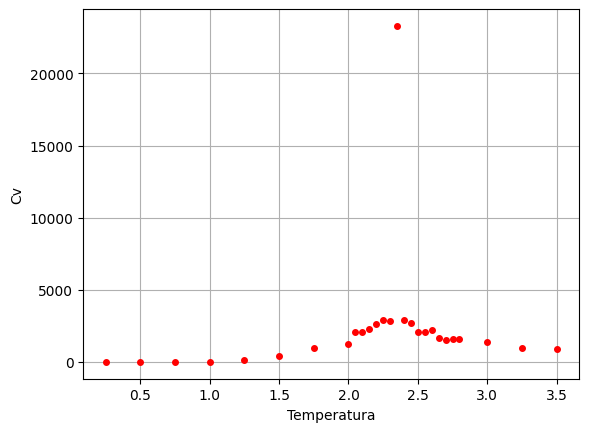

In [ ]:
Cv=[]
for i in range(len(Temperatura)):
  cv=(Mediosdelcuadrado_E[i]-Cuadradosdemedio_E[i])/Temperatura[i]
  Cv.append(cv)

plt.plot(Temperatura,Cv,linestyle='None',marker='.', markersize = 8.0, color='r')
plt.xlabel('Temperatura')
plt.ylabel('Cv')
plt.grid()

In [ ]:
print(Cv[14])  #el pico del cv
print(Temperatura[14]) #la temperatura asociada al pico del cv

23292.239038006875
2.35


A diferencia del que mande antes, tome mas mediciones y la Tc es congruente con lo que obtuve anteriormente: se que el Cv "diverge" (en este caso tengo un pico ya que estoy en una red finita) cuando $T → T_c$, lo cual observo que hace, de forma congruente alrededor de la temperatura que habia estimado en el item anterior.

El punto mas alto lo tengo en T=2.35. Con lo cual estimo que la temperatura critica se encuentra en esa zona.


En comparacion con la aproximacion de campo medio, sucede un poco lo mismo que con la magnetizacion. Esperaria ver que la capacidad calorifica al pasar la temperatura Critica sea 0, pero en lugar de eso tengo observo un cambio continuo.

Analogamente calcule y grafique la Susceptibilidad en funcion de la temperatura. Observe que la temperatura para la cual "diverge" es consistente con lo que obtuve anteriormente.

In [ ]:
#Aca calcula la Susceptibilidad
MediosdelcuadradoM=[]
CuadradosdemedioM=np.array(Magnetizacion)**2

for i in Temperatura:
  estatecuadrado=np.load('gdrive/DIRECTORIO/Magnetizacion de T={temp}.npy'.format(temp=i))
  MediosdelcuadradoM.append(np.mean(estatecuadrado**2))

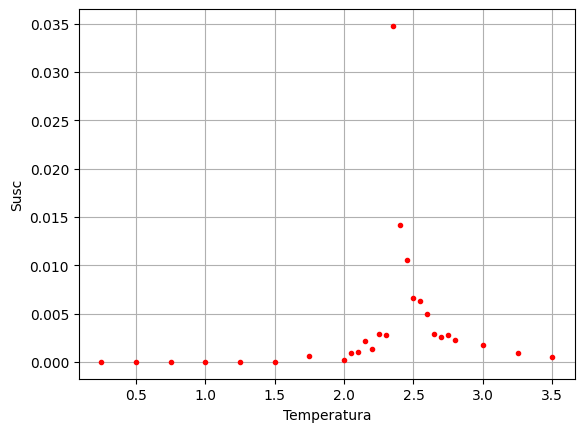

In [ ]:
Susceptibilidad=[]
for i in range(len(Temperatura)):
  susc=(MediosdelcuadradoM[i]-CuadradosdemedioM[i])/Temperatura[i]
  Susceptibilidad.append(susc)

plt.plot(Temperatura,Susceptibilidad,linestyle='None',marker='.', markersize = 6.0, color='r')
plt.xlabel('Temperatura')
plt.ylabel('Susc')
plt.grid()


c) Tomo que el valor de $T_c=2.35$


# Exponentes críticos

Con el valor de $T_c$, encuentre el exponente crítico $\beta$ tal que $m \sim (T-T_c)^\beta$. compare con los resultados exactos y de campos medio. Repita el análisis para el exponente de la susceptibilidad magnética

Beta =  0.11765230521511856


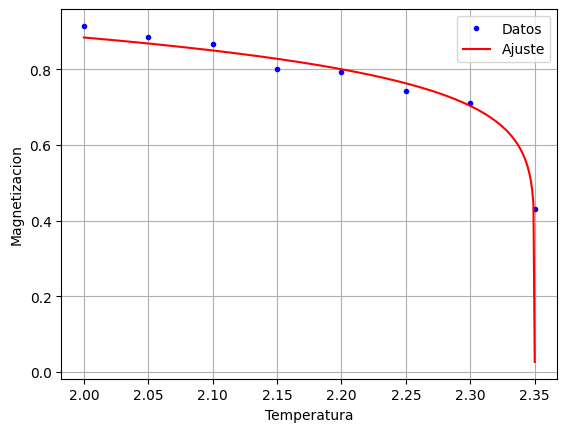

In [ ]:
from scipy.optimize import curve_fit

def ajustemag(x, p):
  return (2.35-x)**p


popt, pcov = curve_fit(ajustemag, Temperatura[7:15],Magnetizacion[7:15],p0=(0.125))


print("Beta = ",popt[0])


n=np.arange(2,2.35,0.001)
plt.plot(Temperatura[7:15],Magnetizacion[7:15], linestyle='None',marker='.', markersize = 6.0, color='b',label='Datos')
plt.plot(n,ajustemag(n,popt[0]), linestyle='-', color='r',label='Ajuste')
plt.ylabel('Magnetizacion')
plt.xlabel('Temperatura')
plt.legend()
plt.grid()



Bueno, esto me dio mejor, hice otro barrido y obtengo un ajuste que me da un exponente de $\beta=0.117$, con lo cual comparado con el valor que habia obtenido anteriormente de $\beta=0.79$, esta mejor. Aca me restringi a temperatuas entre T=2 y T=2.35, basicamente por debajo de la Tc lo mas cerca posible. No estuvo tan facil el tema de hacer un ajuste log, lo unico, me sirvio para ver mejor que esa zona se comportaba de manera lineal. Luego el ajuste es de los datos sin log, me dio asi y entonces no me la quise complicar.

Como se que la magnetizacion se comporta por debajo de la temperatura critica de la forma $\sim (T_c-T)^\beta$ entonces restringo los datos hasta aproximadamente la Tc y de ahi decidi ajustar. Lo que no termino de entender es porque por ejemplo en los valores que obtuve de la simulacion, el rango de temperaturas entre T=0 y T=1 me da una magnetizacion (valor absoluto) de 1... y de ahi comienza a descender, lo cual me parece bien. Pero cuando planteo como se comporta, el Tc-T a la beta, esto claramente para T=1 no alcanza una magnetizacion de uno, sino una mas grande, facilmente se ve si grafico esa funcion para beta=0.125... Capaz que es algo re boludo que no entiendo pero estuve fijandome en los apuntes y no llego a ver la idea en esto de los exponenetes.


**Aca voy a ajustar la Susceptibilidad**

Esto otra vez estuvo dificil, me frustra que la parte que se me complica terriblemente es hacer un ajuste en python, pero bueno. Lo que hago aca es ver que, tomando el log, hay una zona cerca de la temperatura critica por debajo, que se comporta de manera lineal. Con lo cual hago un ajuste de esos datos segun la ecuacion $|T-T_c|^{-\alpha}$.

<ipython-input-56-828b920e8c25>:1: RuntimeWarning: divide by zero encountered in log
  plt.plot(np.log(Temperatura[:]),np.log(Susceptibilidad[:]), linestyle='None',marker='.', markersize = 6.0, color='b')


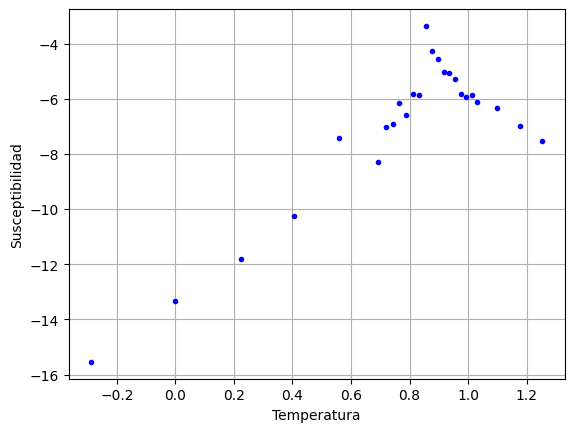

In [ ]:
plt.plot(np.log(Temperatura[:]),np.log(Susceptibilidad[:]), linestyle='None',marker='.', markersize = 6.0, color='b')
plt.ylabel('Susceptibilidad')
plt.xlabel('Temperatura')
plt.grid()

Me voy a quedar con los datos correspondientes al rango de temperatura T=1.50 a T=2.35, en ese rango ajuste segun una lineal de la forma $-\gamma x+c$


Gamma= 1.772066660815043


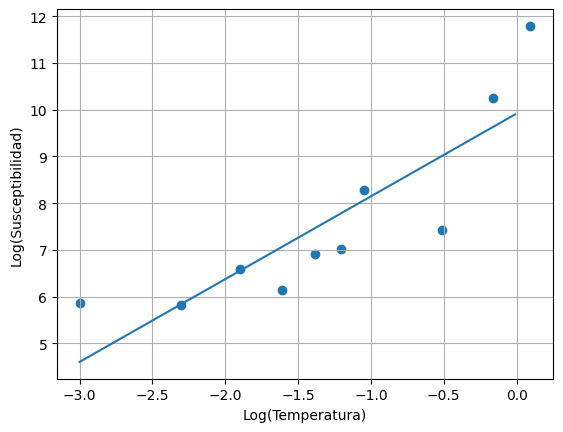

In [ ]:
X=np.log(abs(np.array(Temperatura[4:14])-2.35)).tolist()
Y=np.log(Susceptibilidad[4:14]).tolist()

def ajustesus(x, p,c):
  return -x*p+c

popt, pcov = curve_fit(ajustesus,X,Y,p0=(1.75,0))

n=np.arange(-3,0,0.01)
plt.scatter(X,-np.array(Y))
plt.plot(n,ajustesus(n,-popt[0],-popt[1]))
plt.ylabel('Log(Susceptibilidad)')
plt.xlabel('Log(Temperatura)')
plt.grid()
print("Gamma=",popt[0])



Bueno, y aca no me parecio tan mal lo que obtuve, $\gamma=1.77$. Mejor en comparacion con el valor teorico de $\gamma=1.75$ la verdad que esta. Ahora la cosa es que hice un poco de trampa y fui probando ajustar diferentes puntos hasta que este intervalo parece dar bien. No creo que este tan piola el ajuste porque estoy tomando puntos que no estan tan cerca de la Tc. Y si tomo los que estan ahi cerca no me da para nada el ajuste. Perdon, no tengo mucha idea que hacer, sigo pensando que son los datos que no estan tan lindos, pero al haber hecho ya 3 barridos y encima tardar tanto tiempo en tomarlos...

Aca trate de ajustar los datos que estan sobre la Temperatura critica, desde T=2.35 hasta T=3... Me mantengo un poco mas cerca de la Tc, el ajuste sale, pero no obtengo un coeficiente mejor. Ajusta $\gamma=0.89$
Ya probe, recortando un intervalo mas cerca de la Tc y nada.

Gamma= 0.8918551999526956


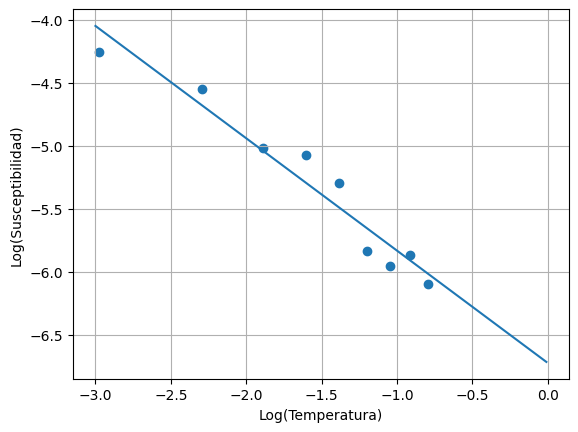

In [ ]:
X=np.log(abs(np.array(Temperatura[15:24])-2.349)).tolist()
Y=np.log(Susceptibilidad[15:24]).tolist()
def ajustesus(x, p,c):
  return -x*p+c

popt, pcov = curve_fit(ajustesus,X,Y,p0=(1.75,0))

n=np.arange(-3,0,0.01)
plt.scatter(X,np.array(Y))
plt.plot(n,ajustesus(n,popt[0],popt[1]))
plt.ylabel('Log(Susceptibilidad)')
plt.xlabel('Log(Temperatura)')
plt.grid()
print("Gamma=",popt[0])

# Correlaciones

La **función de correlación** se define como $g(r)=\langle s_{ij}s_{ij+r}\rangle-\langle s_{ij}\rangle\langle s_{ij+r}\rangle$, y se sabe que tiene la forma $g(r)=ae^{-r/\xi}$. A $\xi$ se lo conoce como la **longitud de correlación**, y es una función de la temperatura que, en el límite termodinámico, diverge a la temperatura crítica. Calcule la longitud de correlación en functión de la temperatura.

Bueno bueno, costo pero creo que casi sale jaja. Me ayude con el script de Guillem, no tenia nada armado pero tiraba algunas pistas sobre como hacerlo.

Arme mi funcion cor, (letra C) que me da un vector en donde el elemento del vector es la posicion r. Es un vector de longitud N/2 porque sino cuando me paso en el r comienzo a recorrer dos veces. Hice el dibujito y la cuentita con N=3 para darme cuenta, se entendio creo.

Luego lo que hice fue armar una funcion montecarlo2 que basicamente me evoluciona el estado inicial, me va dando la magnetizacion de cada estado y me devuelve tambien como evoluciona cada componente del vector c. Arme una lista con N/2 componentes y con cada iteracion le mete a cada componente la funcion cor de ese estado.
Pareciese tener sentido, al menos en mi cabeza jaja.

Bueno, y calcule y grafique para 3 Temperaturas diferentes ahora si la funcion correlacion. Considere T=1.3, T=2.3 y T=3.3.

In [ ]:
def cor(state,r):
  if r==0:
    c=1
  else:
    c=0
    for i in range(N): # 0, 1, ..., N-1
      for j in range(N):
        a = (j+r)%N
        c =c+ (state[i,j]*state[i,a])/N**2
  return c

def montecarlo2(beta,N=4,J=1,out_freq=100,num_iters=200000,odir=''):
    # Random initial configuration
    state  = np.random.choice([-1,1],size=(N,N))
    state0 = copy.copy(state)
    magnetiz = []
    c=[[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[]]

    for k in range(num_iters):

      if k%out_freq == 0:
          magnetiz.append((np.sum(state))/N**2)
          for r in range(int(N/2)):
            c[r].append(cor(state,r))


      # Random spin to be flipped
      i,j = np.random.randint(N), np.random.randint(N)
      H0  = reduced(state,i,j,J)

      # Flip spin
      state[i,j] = -1*state[i,j]
      H = reduced(state,i,j,J)
      deltaH = H-H0

      if deltaH<=0:
          # If the flip lowers the energy, accept it
          pass
      else:
          # If the flip increases the energy, accept it
          # with probability exp(-beta*deltaH)
          # Otherwise revert back to original state
          prob = np.exp(-beta*deltaH)
          coin = np.random.random()
          if coin<prob:
              pass
          else:
              state[i,j] = -1*state[i,j]

    # Return solution
    return np.array(magnetiz),np.array(c),state,state0

**Estas dos no hace falta correrlas**

In [ ]:
T=2.3
pasos = 10000
N = 32
num_iters = pasos * 100
beta= 1.0/T

out_freq  = 100

magnetiz, correlacion, state, state0 = montecarlo2(beta,
                                              N=N,
                                              J=1,
                                              num_iters=num_iters,
                                              out_freq=out_freq)

steps = np.arange(num_iters//out_freq)
plt.figure(1)
plt.plot(steps, abs(magnetiz),label = 'Magnetización total instantánea' )
plt.xlabel('Iteración')
plt.ylabel('Magnetización')
plt.title('T = {temp}, Largo de la red = {N}'.format(temp = T, N=N))
plt.legend()

In [ ]:
trigger=3000
mmedia=np.mean(abs(magnetiz)[trigger:])
G=[]
for h in range(int(N/2)):
  letra=np.array(correlacion[h][trigger:])
  G.append(np.mean(abs(letra)))
print(G)
Funcioncorr=G-mmedia**2
erres=np.arange(int(N/2))

plt.plot(erres,Funcioncorr)
plt.xlabel('r')
plt.ylabel('Funcion correlacion')
plt.title('T = {temp}, Largo de la red = {N}'.format(temp = T, N=N))
plt.legend()

La celda anterior es mas que nada para que se vea el codigo.

***CORRER DESDE ACA***

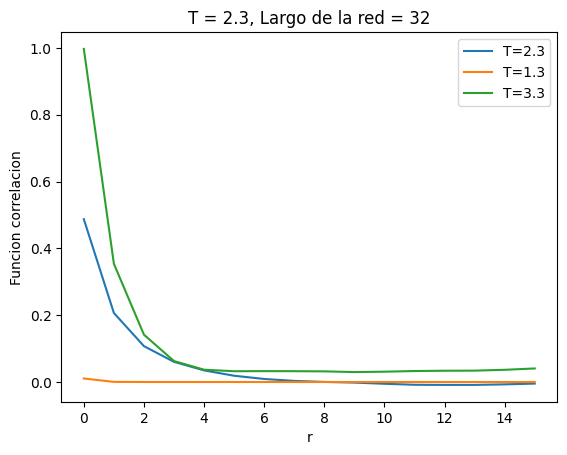

In [ ]:
F13=[0.010550150817871251, 0.0004043174845379527, 1.1088317871221776e-05, -1.4953348795421206e-05, 2.1504984537901173e-05, 1.6296651204616985e-05, 3.4525817871222664e-05, -1.9325154620997154e-06, -1.75575154620633e-05, -1.4953348795421206e-05, 2.6713317871296383e-05, 5.879984537937588e-06, -9.745015462137019e-06, -2.7974182128742697e-05, -2.7974182128742697e-05, -2.5370015462100604e-05]
F23=[0.48733281243896487, 0.20653398431396486, 0.10737773431396491, 0.060318164001464836, 0.034839648376464916, 0.018754687438964912, 0.009088671813964888, 0.0032937499389649183, 0.00027226556396486856, -0.0017472656860351155, -0.005301953186035102, -0.008254101623535126, -0.008716015686035083, -0.008691601623535106, -0.007053906311035085, -0.0047423828735351226]
F33=[0.9968792938079833, 0.3538324188079834, 0.14161887714131674, 0.06272564797465006, 0.03677859936353895, 0.03227946741909451, 0.032574606307983395, 0.03237668964131673, 0.03184023130798339, 0.02974214103020562, 0.030889710474650067, 0.03282373825242784, 0.033759502141316726, 0.034000821585761176, 0.03653641186353895, 0.04054509241909451]
erres=np.arange(int(N/2))
plt.plot(erres,F23,label="T=2.3")
plt.plot(erres,F13,label="T=1.3")
plt.plot(erres,F33,label="T=3.3")
plt.xlabel('r')
plt.ylabel('Funcion correlacion')
plt.title('T = {temp}, Largo de la red = {N}'.format(temp = T, N=N))
plt.legend()

Bueno, aca lo que no me gusta, a medida que avanzan en r, no parece que las funciones se planchen en el 0, capaz es porque para T=3.3 y T=2.3 no tome muchas iteraciones, sino me tardaba una barbaridad.
Lo que hago ahora es ajustar para cada curva la longitud de correlacion:


In [ ]:
def corrajuste(r,a,xi):
  return a*np.exp(-r/xi)
popt, pcov = curve_fit(corrajuste,erres,F13)
print("Long Correlacion T=1.3 :", popt[0])
popt, pcov = curve_fit(corrajuste,erres,F23)
print("Long Correlacion T=2.3 :", popt[0])
popt, pcov = curve_fit(corrajuste,erres,F33)
print("Long Correlacion T=3.3 :", popt[0])

Long Correlacion T=1.3 : 0.010550158832473459
Long Correlacion T=2.3 : 0.48172247215019137
Long Correlacion T=3.3 : 0.9926973258054326


Bueno, y con esto doy terminada la parte de Funcion de correlacion.



Adjunto algunos graficos respecto a las Temperaturas y el numero de iteracion.

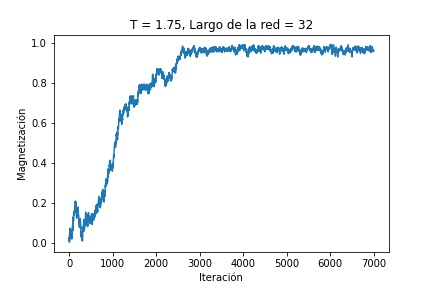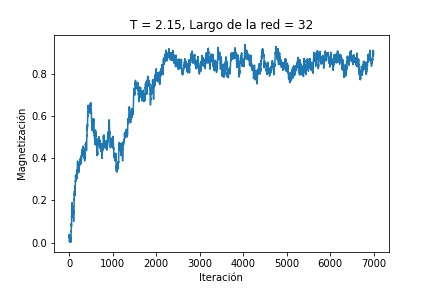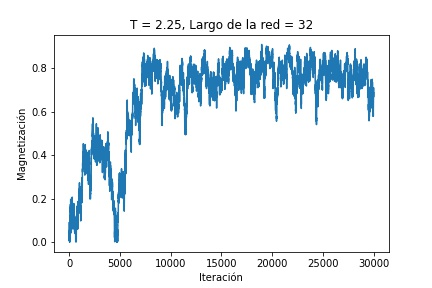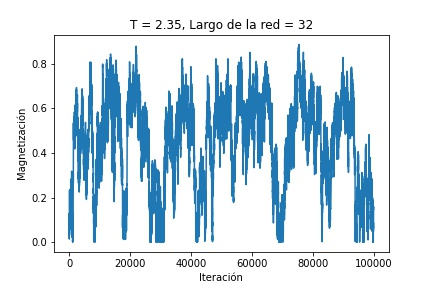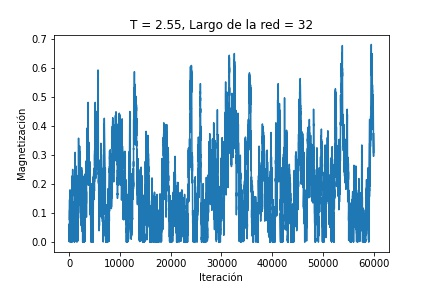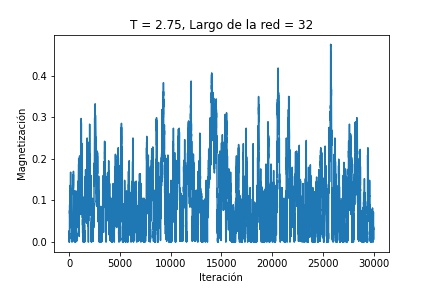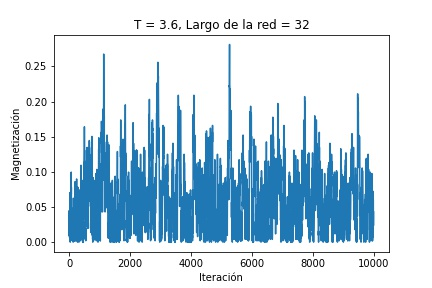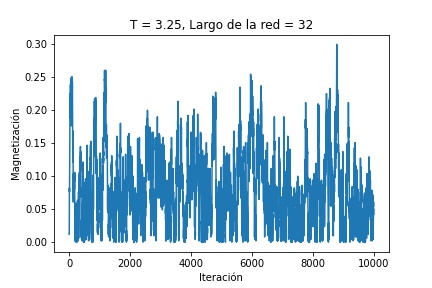

Ya para valores sobre T=3.0 las oscilaciones de la magnetizacion son demasiado grandes y era mas complicado encontrar un valor claro en el grafico para el cual el sistema termalizaba. Realmente esto pasaba para valores de T mayores a Tc.